In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

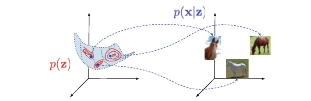

Fig.1 A diagram presenting a latent variable model and a generative process. Notice the low- dimensional manifold (here 2D) embedded in the high-dimensional space (here 3D).


## Latent Variable Models

##  Introduction

In the previous sections, we discussed two approaches to learning $ p(x) $:
- **Autoregressive models (ARMs)** (Chapter 3)
- **Flow-based models (Flows)** (Chapter 4)

Both ARMs and Flows model the likelihood function directly:
1. **ARMs**: Factorize the distribution and parameterize conditional distributions $ p(x_d \mid x_{<d}) $.
2. **Flows**: Utilize invertible transformations (neural networks) and the change of variables formula.

Now, we will discuss a third approach that introduces **latent variables**.

---

### Generative Modeling Scenario

Consider a collection of horse images. To learn $ p(x) $, e.g., for generating new images, we can imagine the generative process:
1. Sketch the silhouette of the horse, its size, and shape.
2. Add details like hooves, head, and color.
3. Finally, consider the background.

This step-by-step process highlights **factors of variation** (e.g., silhouette, color, background) crucial for generating an object. Using mathematics, this generative process is expressed as:

1. Sample a **low-dimensional latent variable** $ \mathbf{z} \in \mathcal{Z}^M $ (hidden factors in the data).
2. Generate a high-dimensional object $ \mathbf{x} \in \mathcal{X}^D $ by sampling from the conditional distribution $ p(\mathbf{x} \mid \mathbf{z}) $.

---

### Generative Process

$$
\mathbf{z} \sim p(\mathbf{z})
$$

$$
\mathbf{x} \sim p(\mathbf{x} \mid \mathbf{z})
$$

The joint distribution is factorized as:

$$
p(\mathbf{x}, \mathbf{z}) = p(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}).
$$

However, for training, we only have access to $ \mathbf{x} $. Using probabilistic inference, we marginalize over $ \mathbf{z} $:

$$
p(\mathbf{x}) = \int p(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) \, d\mathbf{z}. \tag{5.1}
$$

Calculating this integral is generally challenging, with two possible approaches:
1. **Tractable Integral** (discussed briefly).
2. **Approximate Inference** using **Variational Inference** (primary focus).

---

##  Probabilistic Principal Component Analysis (PPCA)

Let us discuss the following scenario:
- $ \mathbf{z} \in \mathbb{R}^M $ and $ \mathbf{x} \in \mathbb{R}^D $ (continuous random variables).
- Latent variables $ \mathbf{z} $ follow a standard Gaussian distribution:

$$
p(\mathbf{z}) = \mathcal{N}(\mathbf{z} \mid \mathbf{0}, \mathbf{I}).
$$

- The dependency between $ \mathbf{z} $ and $ \mathbf{x} $ is **linear**, with **Gaussian additive noise**:

$$
\mathbf{x} = \mathbf{W}\mathbf{z} + \mathbf{\mu} + \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2 \mathbf{I}),
$$

where:
- $ \mathbf{W} \in \mathbb{R}^{D \times M} $ is a linear transformation matrix.
- $ \mathbf{\mu} \in \mathbb{R}^D $ is the mean vector.
- $ \boldsymbol{\epsilon} $ is Gaussian noise with variance $ \sigma^2 $.

---

### Likelihood Function

The marginal likelihood of $ \mathbf{x} $ is given by:

$$
p(\mathbf{x}) = \int p(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) \, d\mathbf{z}.
$$

Using the linear dependency, $ p(\mathbf{x} \mid \mathbf{z}) $ is Gaussian:

$$
p(\mathbf{x} \mid \mathbf{z}) = \mathcal{N}(\mathbf{x} \mid \mathbf{W}\mathbf{z} + \mathbf{\mu}, \sigma^2 \mathbf{I}).
$$

The prior $ p(\mathbf{z}) $ is also Gaussian:

$$
p(\mathbf{z}) = \mathcal{N}(\mathbf{z} \mid \mathbf{0}, \mathbf{I}).
$$

---

### Marginal Distribution

The marginal $ p(\mathbf{x}) $ becomes a Gaussian distribution:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mathbf{\mu}, \mathbf{C}),
$$

where:

$$
\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}.
$$

This concludes the description of PPCA in the context of latent variable models.


## Probabilistic Principal Component Analysis (pPCA)

### Assumptions

We consider the following setup:
- $ \mathbf{z} \in \mathbb{R}^M $ and $ \mathbf{x} \in \mathbb{R}^D $ (continuous random variables).
- Latent variables $ \mathbf{z} $ follow a standard Gaussian distribution:

$$
p(\mathbf{z}) = \mathcal{N}(\mathbf{z} \mid \mathbf{0}, \mathbf{I}).
$$

- The dependency between $ \mathbf{z} $ and $ \mathbf{x} $ is **linear**, with Gaussian additive noise:

$$
\mathbf{x} = \mathbf{W}\mathbf{z} + \mathbf{b} + \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(\boldsymbol{\epsilon} \mid \mathbf{0}, \sigma^2 \mathbf{I}). \tag{5.2}
$$

---

### Conditional Distribution

Using the properties of Gaussian distributions, the conditional probability $ p(\mathbf{x} \mid \mathbf{z}) $ is:

$$
p(\mathbf{x} \mid \mathbf{z}) = \mathcal{N}(\mathbf{x} \mid \mathbf{W}\mathbf{z} + \mathbf{b}, \sigma^2 \mathbf{I}). \tag{5.3}
$$

This model is known as the **probabilistic Principal Component Analysis (pPCA)**.

---

### Marginal Likelihood

The marginal likelihood $ p(\mathbf{x}) $ is calculated by integrating over $ \mathbf{z} $:

$$
p(\mathbf{x}) = \int p(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) \, d\mathbf{z}. \tag{5.4}
$$

Substituting the Gaussian distributions:

$$
p(\mathbf{x}) = \int \mathcal{N}(\mathbf{x} \mid \mathbf{W}\mathbf{z} + \mathbf{b}, \sigma^2 \mathbf{I}) \mathcal{N}(\mathbf{z} \mid \mathbf{0}, \mathbf{I}) \, d\mathbf{z}. \tag{5.5}
$$

The result of this integration is another Gaussian distribution:

$$
p(\mathbf{x}) = \mathcal{N}(\mathbf{x} \mid \mathbf{b}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}). \tag{5.6}
$$

---

### Posterior Distribution

Due to the properties of Gaussian distributions, the posterior $ p(\mathbf{z} \mid \mathbf{x}) $ can also be computed analytically:

$$
p(\mathbf{z} \mid \mathbf{x}) = \mathcal{N}(\mathbf{z} \mid \mathbf{M}^{-1} \mathbf{W}^\top (\mathbf{x} - \mathbf{b}), \sigma^2 \mathbf{M}^{-1}), \tag{5.7}
$$

where:

$$
\mathbf{M} = \mathbf{W}^\top \mathbf{W} + \sigma^2 \mathbf{I}.
$$

---

### Key Takeaways

1. Once $ \mathbf{W} $ is found by maximizing the log-likelihood, and its dimensionality is computationally tractable, we can calculate $ p(\mathbf{z} \mid \mathbf{x}) $ for any observation $ \mathbf{x} $. 
2. This is significant because it allows us to compute the distribution over latent factors for given data points.

---

### A Side Note

Probabilistic PCA is an essential latent variable model for two reasons:
1. **Analytical tractability**: All computations can be done by hand, making it an excellent exercise for building intuition about latent variable models.
2. **Linearity**: As a linear model, it raises important questions:
   - What happens with **non-linear dependencies**?
   - What happens if we use distributions other than Gaussians?

In both cases, the integral in $ p(\mathbf{x}) $ becomes intractable, requiring approximations such as **variational inference**.

Thus, studying pPCA in depth helps develop a solid understanding of probabilistic modeling concepts.


Epoch [0/1000], Log-Likelihood: -355.7412
Epoch [100/1000], Log-Likelihood: -381.8489
Epoch [200/1000], Log-Likelihood: -406.8539
Epoch [300/1000], Log-Likelihood: -430.4676
Epoch [400/1000], Log-Likelihood: -452.6530
Epoch [500/1000], Log-Likelihood: -473.5280
Epoch [600/1000], Log-Likelihood: -493.2508
Epoch [700/1000], Log-Likelihood: -511.9764
Epoch [800/1000], Log-Likelihood: -529.8442
Epoch [900/1000], Log-Likelihood: -546.9756


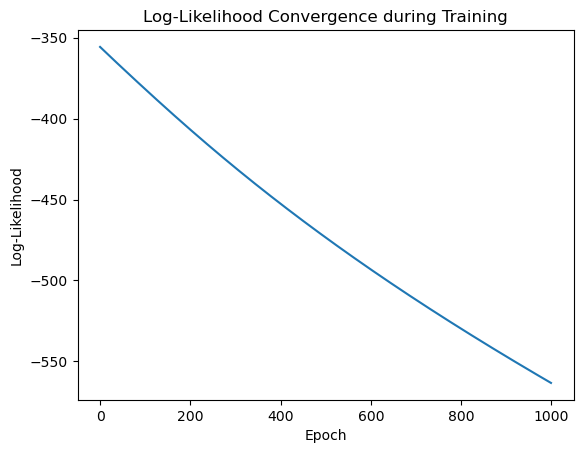

AttributeError: module 'torch' has no attribute 'linalg'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class pPCA(nn.Module):
    def __init__(self, D, M, sigma=1.0):
        """
        Probabilistic PCA model
        
        Args:
            D (int): Dimensionality of the data.
            M (int): Dimensionality of the latent variable.
            sigma (float): Standard deviation of the Gaussian noise.
        """
        super(pPCA, self).__init__()
        self.D = D  # Dimensionality of input
        self.M = M  # Dimensionality of latent space
        self.sigma = sigma  # Standard deviation of noise
        
        # Weight matrix W and bias term b (initialization)
        self.W = nn.Parameter(torch.randn(D, M))  # D x M matrix
        self.b = nn.Parameter(torch.randn(D))     # D-dimensional bias

    def forward(self, z):
        """
        Forward pass for pPCA model: x = Wz + b + noise
        
        Args:
            z (Tensor): Latent variable of shape (batch_size, M)
        
        Returns:
            x (Tensor): Data point reconstructed from latent variable, of shape (batch_size, D)
        """
        # Reconstruct the data point
        return torch.matmul(z, self.W.t()) + self.b

    def log_likelihood(self, x):
        """
        Compute the log-likelihood of the data under pPCA model

        Args:
            x (Tensor): Data, shape (batch_size, D)

        Returns:
            log_likelihood (Tensor): Log-likelihood of the data
        """
        batch_size = x.shape[0]

        # Compute the covariance matrix
        covariance_matrix = torch.matmul(self.W, self.W.t()) + self.sigma ** 2 * torch.eye(self.D)

        # Compute the log-likelihood of the Gaussian with mean b and covariance covariance_matrix
        diff = x - self.b
        inverse_covariance = torch.inverse(covariance_matrix)  # Compute the inverse of covariance matrix
        log_prob = -0.5 * (torch.sum(torch.matmul(diff, inverse_covariance) * diff, dim=1)
                          + batch_size * torch.log(torch.det(covariance_matrix)) + self.D * np.log(2 * np.pi))

        return torch.mean(log_prob)


    def posterior(self, x):
        """
        Compute the posterior distribution p(z | x)
        
        Args:
            x (Tensor): Data, shape (batch_size, D)
        
        Returns:
            mean_z (Tensor): Posterior mean for z, shape (batch_size, M)
            covariance_z (Tensor): Posterior covariance for z, shape (batch_size, M, M)
        """
        covariance_matrix = torch.matmul(self.W, self.W.t()) + self.sigma ** 2 * torch.eye(self.D)
        mean_z = torch.matmul(torch.linalg.inv(covariance_matrix), x - self.b)
        covariance_z = torch.linalg.inv(torch.matmul(self.W, self.W.t()) + self.sigma ** 2 * torch.eye(self.M))

        return mean_z, covariance_z

# Generate synthetic data
D = 10  # Dimensionality of the data
M = 3   # Latent dimensionality
N = 100  # Number of samples

# Generate latent variables z ~ N(0, I)
z = np.random.randn(N, M)
W_true = np.random.randn(D, M)
b_true = np.random.randn(D)
x_true = np.dot(z, W_true.T) + b_true + np.random.randn(N, D) * 0.1  # Adding noise

# Convert data to PyTorch tensors
x_data = torch.tensor(x_true, dtype=torch.float32)

# Initialize pPCA model
model = pPCA(D, M)

# Set up the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 1000
log_likelihoods = []

for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Sample from the latent variable z (random initial guess)
    z_init = torch.randn(N, M)
    
    # Forward pass: Reconstruct data from z
    x_reconstructed = model(z_init)

    # Compute log-likelihood and backpropagate
    log_likelihood = model.log_likelihood(x_data)
    log_likelihoods.append(log_likelihood.item())
    log_likelihood.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Log-Likelihood: {log_likelihood.item():.4f}')

# Plot log-likelihood convergence
plt.plot(log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Convergence during Training')
plt.show()

# Posterior estimation for the first data point
mean_z, covariance_z = model.posterior(x_data[0].unsqueeze(0))
print("Posterior mean of latent variables:", mean_z)
print("Posterior covariance of latent variables:", covariance_z)


In [ ]:
import random
import math

class pPCA:
    def __init__(self, D, M, sigma=1.0):
        """
        Initializes the Probabilistic PCA model.
        
        Args:
            D (int): Dimensionality of the data
            M (int): Number of latent variables
            sigma (float): Standard deviation for the Gaussian noise
        """
        self.D = D  # Dimensionality of the data
        self.M = M  # Dimensionality of the latent variables
        self.sigma = sigma  # Standard deviation of Gaussian noise

        # Initialize parameters randomly
        self.W = [[random.gauss(0, 1) for _ in range(M)] for _ in range(D)]  # Transformation matrix
        self.b = [random.gauss(0, 1) for _ in range(D)]  # Bias term

    def matmul(self, A, B):
        """Performs matrix multiplication (A @ B)"""
        result = []
        for i in range(len(A)):
            result.append([sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))])
        return result

    def transpose(self, matrix):
        """Transposes a matrix"""
        return [list(i) for i in zip(*matrix)]

    def generate_data(self, batch_size):
        """
        Generate data samples using the model parameters.
        
        Args:
            batch_size (int): Number of data points to generate
        
        Returns:
            List: Generated data points
        """
        data_points = []
        for _ in range(batch_size):
            # Sample z from standard normal distribution
            z = [random.gauss(0, 1) for _ in range(self.M)]
            
            # Reconstruct x from z
            x_reconstructed = [sum(self.W[i][j] * z[j] for j in range(self.M)) + self.b[i] for i in range(self.D)]
            
            # Add Gaussian noise
            noise = [random.gauss(0, self.sigma) for _ in range(self.D)]
            x = [x_reconstructed[i] + noise[i] for i in range(self.D)]
            
            data_points.append(x)
        
        return data_points

    def log_likelihood(self, x_data):
        """
        Compute the log-likelihood of the data under the pPCA model.
        
        Args:
            x_data (List): List of data points
        
        Returns:
            float: Log-likelihood of the data
        """
        log_likelihoods = []
        for x in x_data:
            # Compute covariance matrix: W * W.T + sigma^2 * I
            W_T = self.transpose(self.W)
            cov_matrix = self.matmul(self.W, W_T)
            
            # Add noise term (sigma^2 * I)
            for i in range(self.D):
                cov_matrix[i][i] += self.sigma ** 2
            
            # Compute the difference (x - b)
            diff = [x[i] - self.b[i] for i in range(self.D)]
            
            # Compute the log-probability for the Gaussian distribution
            det_cov = self.determinant(cov_matrix)
            log_prob = -0.5 * (self.vector_dot(self.vector_dot(diff, cov_matrix), diff) + self.D * math.log(2 * math.pi) + math.log(det_cov))
            log_likelihoods.append(log_prob)
        
        return sum(log_likelihoods) / len(log_likelihoods)

    def vector_dot(self, A, B):
        """Computes dot product of two vectors A and B"""
        return sum(A[i] * B[i] for i in range(len(A)))

    def determinant(self, matrix):
        """Computes the determinant of a square matrix using recursion (Laplace expansion)"""
        n = len(matrix)
        if n == 1:
            return matrix[0][0]
        elif n == 2:
            return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
        
        det = 0
        for c in range(n):
            # Minor matrix for element at matrix[0][c]
            minor = [row[:c] + row[c+1:] for row in matrix[1:]]
            det += ((-1) ** c) * matrix[0][c] * self.determinant(minor)
        
        return det

# Initialize the model
D = 20  # Data dimensionality
M = 5   # Latent space dimensionality
sigma = 1.0  # Gaussian noise standard deviation
model = pPCA(D, M, sigma)

# Example usage with synthetic data
batch_size = 10
x_data = model.generate_data(batch_size)

# Compute log-likelihood of the generated data
log_likelihood = model.log_likelihood(x_data)
print(f"Log-Likelihood of the data: {log_likelihood}")


###  Variational Auto-encoders: Variational Inference for Nonlinear Latent Variable Models

####  The Model and the Objective

Let us take a look at the integral one more time and think of a general case where we cannot calculate it analytically. The simplest approach would be to use the Monte Carlo approximation:

$$
\int p(x) = \int p(x|z) p(z) \, dz
$$

This can be approximated as:

$$
\mathbb{E}_{z \sim p(z)} [p(x|z)]
$$

or equivalently:

$$
\frac{1}{K} \sum_{k=1}^{K} p(x|z_k)
$$

where, in the last line, we use samples from the prior over latents, $ z_k \sim p(z) $. Such an approach is relatively easy, and since our computational power grows rapidly, we can sample a lot of points in a reasonably short time. However, as we know from statistics, if $ z $ is multidimensional, and $ M $ is relatively large, we encounter the curse of dimensionality, and to cover the space properly, the number of samples grows exponentially with respect to $ M $. If we take too few samples, the approximation becomes poor.

We can use more advanced Monte Carlo techniques, but they still suffer from issues associated with the curse of dimensionality. An alternative approach is an application of **variational inference**.

Let us consider a family of variational distributions parameterized by $ \phi $, $ \{q_{\phi}(z)\}_{\phi} $. For instance, we can consider Gaussians with means and variances, $ \phi = \{ \mu, \sigma^2 \} $. We know the form of these distributions, and we assume that they assign nonzero probability mass to all $ z \in \mathbb{R}^M $.

Then, the logarithm of the marginal distribution could be approximated as follows:

$$
\ln p(x) = \ln \int p(x|z) p(z) \, dz
$$

Using the variational distribution $ q_\phi(z) $, we can rewrite it as:

$$
\ln p(x) = \int q_\phi(z) \frac{p(x|z) p(z)}{q_\phi(z)} \, dz
$$

By applying **Jensen's inequality**, we get the following lower bound:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z)} \left[ \ln \frac{p(x|z) p(z)}{q_\phi(z)} \right]
$$

This can be expanded as:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z)} \left[ \ln q_\phi(z) \right] - \ln p(z)
$$

This is the basis of variational inference, where the objective is to maximize the **ELBO (Evidence Lower Bound)**:

$$
\mathcal{L}(\phi) = \mathbb{E}_{z \sim q_\phi(z)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z)} \left[ \ln q_\phi(z) \right] - \ln p(z)
$$

This approach avoids the curse of dimensionality by approximating the intractable integral with a simpler variational distribution $ q_\phi(z) $.

###  Variational Auto-encoders: Variational Inference for Nonlinear Latent Variable Models

####  The Amortized Variational Posterior

If we consider an amortized variational posterior, namely, $ q_\phi(z|x) $ instead of $ q_\phi(z) $ for each $ x $, then we get:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

Amortization could be extremely useful because we train a single model (e.g., a neural network with some weights), and it returns the parameters of the distribution for a given input. From now on, we will assume that we use amortized variational posteriors. However, please remember that we do not need to do that! Please refer to [5], where semi-amortized variational inference is considered.

As a result, we obtain an auto-encoder-like model, with a **stochastic encoder**, $ q_\phi(z|x) $, and a **stochastic decoder**, $ p(x|z) $. We use "stochastic" to highlight that the encoder and the decoder are probability distributions, in contrast to a deterministic auto-encoder. This model, with the amortized variational posterior, is called a **Variational Auto-Encoder (VAE)**.

The lower bound of the log-likelihood function is called the **evidence lower bound (ELBO)**. The first part of the ELBO, $ \mathbb{E}_{z \sim q_\phi(z|x)} [\ln p(x|z)] $, is referred to as the **(negative) reconstruction error**, because $ x $ is encoded to $ z $ and then decoded back. The second part of the ELBO, $ \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) - \ln p(z) \right] $, could be seen as a **regularizer**, and it coincides with the **Kullback-Leibler divergence (KL)**. However, for more complex models (e.g., hierarchical models), the regularizer(s) may not be interpreted as the KL term, so we prefer to use the term **regularizer**, as it is more general.

#### A Different Perspective on the ELBO

For completeness, we provide a different derivation of the ELBO that will help us understand why the lower bound might be tricky sometimes:

$$
\ln p(x) = \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x) \right]
$$

We can expand this expression as:

$$
p(z|x)p(x) = \mathbb{E}_{z \sim q_\phi(z|x)} \ln \left( \frac{p(z|x)p(x)}{q_\phi(z|x)} \right)
$$

Simplifying further:

$$
= \mathbb{E}_{z \sim q_\phi(z|x)} \ln \left( \frac{p(x|z)p(z)}{q_\phi(z|x)} \right)
$$

Breaking it down into terms:

$$
= \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

This leads us to the final expression for the ELBO:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

This formulation highlights the **Kullback-Leibler divergence** between the variational posterior $ q_\phi(z|x) $ and the true posterior $ p(z|x) $, which measures the gap between the variational distribution and the true distribution. This KL divergence term is always greater than or equal to zero.

Thus, the ELBO can be thought of as a lower bound on the true log-likelihood, with the KL term representing the gap between the ELBO and the true log-likelihood.

### Key Insight

If the variational posterior $ q_\phi(z|x) $ is a poor approximation of the true posterior $ p(z|x) $, then the KL term will be large, and even if the ELBO is optimized well, the gap between the ELBO and the true log-likelihood could be huge. This means that if we use too simplistic a posterior, we could end up with a bad VAE, even if the ELBO is optimized effectively.

The problem arises when the ELBO is a loose lower bound of the log-likelihood, which means the optimal solution of the ELBO could be completely different from the solution of the log-likelihood.

#### Final Considerations

This insight emphasizes the importance of choosing a good approximation for the variational posterior $ q_\phi(z|x) $. If we take a too simplistic posterior, the VAE might not perform well, and the ELBO might not adequately reflect the true log-likelihood.

This is why carefully designing the variational posterior, such as using more complex models (e.g., hierarchical models), can improve the performance of the VAE and reduce the gap between the ELBO and the true log-likelihood.

###  Variational Auto-encoders: Variational Inference for Nonlinear Latent Variable Models

####  The Amortized Variational Posterior

If we consider an amortized variational posterior, namely, $ q_\phi(z|x) $ instead of $ q_\phi(z) $ for each $ x $, then we get:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

Amortization could be extremely useful because we train a single model (e.g., a neural network with some weights), and it returns the parameters of the distribution for a given input. From now on, we will assume that we use amortized variational posteriors. However, please remember that we do not need to do that! Please refer to [5], where semi-amortized variational inference is considered.

As a result, we obtain an auto-encoder-like model, with a **stochastic encoder**, $ q_\phi(z|x) $, and a **stochastic decoder**, $ p(x|z) $. We use "stochastic" to highlight that the encoder and the decoder are probability distributions, in contrast to a deterministic auto-encoder. This model, with the amortized variational posterior, is called a **Variational Auto-Encoder (VAE)**.

The lower bound of the log-likelihood function is called the **evidence lower bound (ELBO)**. The first part of the ELBO, $ \mathbb{E}_{z \sim q_\phi(z|x)} [\ln p(x|z)] $, is referred to as the **(negative) reconstruction error**, because $ x $ is encoded to $ z $ and then decoded back. The second part of the ELBO, $ \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) - \ln p(z) \right] $, could be seen as a **regularizer**, and it coincides with the **Kullback-Leibler divergence (KL)**. However, for more complex models (e.g., hierarchical models), the regularizer(s) may not be interpreted as the KL term, so we prefer to use the term **regularizer**, as it is more general.

####  A Different Perspective on the ELBO

For completeness, we provide a different derivation of the ELBO that will help us understand why the lower bound might be tricky sometimes:

$$
\ln p(x) = \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x) \right]
$$

We can expand this expression as:

$$
p(z|x)p(x) = \mathbb{E}_{z \sim q_\phi(z|x)} \ln \left( \frac{p(z|x)p(x)}{q_\phi(z|x)} \right)
$$

Simplifying further:

$$
= \mathbb{E}_{z \sim q_\phi(z|x)} \ln \left( \frac{p(x|z)p(z)}{q_\phi(z|x)} \right)
$$

Breaking it down into terms:

$$
= \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

This leads us to the final expression for the ELBO:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_\phi(z|x)} \left[ \ln q_\phi(z|x) \right] - \ln p(z)
$$

This formulation highlights the **Kullback-Leibler divergence** between the variational posterior $ q_\phi(z|x) $ and the true posterior $ p(z|x) $, which measures the gap between the variational distribution and the true distribution. This KL divergence term is always greater than or equal to zero.

Thus, the ELBO can be thought of as a lower bound on the true log-likelihood, with the KL term representing the gap between the ELBO and the true log-likelihood.

### Key Insight

If the variational posterior $ q_\phi(z|x) $ is a poor approximation of the true posterior $ p(z|x) $, then the KL term will be large, and even if the ELBO is optimized well, the gap between the ELBO and the true log-likelihood could be huge. This means that if we use too simplistic a posterior, we could end up with a bad VAE, even if the ELBO is optimized effectively.

The problem arises when the ELBO is a loose lower bound of the log-likelihood, which means the optimal solution of the ELBO could be completely different from the solution of the log-likelihood.

#### Final Considerations

This insight emphasizes the importance of choosing a good approximation for the variational posterior $ q_\phi(z|x) $. If we take a too simplistic posterior, the VAE might not perform well, and the ELBO might not adequately reflect the true log-likelihood.

This is why carefully designing the variational posterior, such as using more complex models (e.g., hierarchical models), can improve the performance of the VAE and reduce the gap between the ELBO and the true log-likelihood.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the encoder network (Q_phi)
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mu = nn.Linear(hidden_dim, latent_dim)  # mean of z
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)  # log variance of z

    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc2_mu(h1)
        logvar = self.fc2_logvar(h1)
        return mu, logvar  # Return mean and log variance for the posterior distribution

# Define the decoder network (P_theta)
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h1 = F.relu(self.fc1(z))
        x_recon = torch.sigmoid(self.fc2(h1))  # For binary data, use sigmoid
        return x_recon

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        # Reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

    def loss_function(self, x, x_recon, mu, logvar):
        # Compute the reconstruction loss (negative log-likelihood)
        BCE = F.binary_cross_entropy(x_recon, x, reduction='sum')

        # Compute the KL divergence
        # Kullback-Leibler divergence between q(z|x) and p(z)
        # q(z|x) = N(mu, exp(logvar)), p(z) = N(0, I)
        # KL(q(z|x) || p(z)) = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        # where mu and logvar are the mean and log variance from the encoder output
        # and the sigma^2 is exp(logvar).
        # You can think of this as the regularizer term.
        KL_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        # The ELBO (evidence lower bound) is the negative of this loss:
        # ELBO = Reconstruction Loss + KL Divergence
        return BCE + KL_div

# Hyperparameters
input_dim = 784  # For MNIST dataset (28x28 images)
hidden_dim = 400
latent_dim = 20
batch_size = 64
epochs = 10
learning_rate = 1e-3

# Example input data
# Let's assume x_data is a batch of images, shape: [batch_size, input_dim]
x_data = torch.randn(batch_size, input_dim)  # Replace with real data

# Initialize the model, optimizer, and loss function
model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    x_recon, mu, logvar = model(x_data)

    # Compute the loss
    loss = model.loss_function(x_data, x_recon, mu, logvar)

    # Backpropagation and optimization step
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# After training, we can use the VAE to generate new samples or calculate the ELBO on new data


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the encoder network (Q_phi)
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2_mu = nn.Linear(hidden_dim, latent_dim)  # mean of z
        self.fc2_logvar = nn.Linear(hidden_dim, latent_dim)  # log variance of z

    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc2_mu(h1)
        logvar = self.fc2_logvar(h1)
        return mu, logvar  # Return mean and log variance for the posterior distribution

# Define the decoder network (P_theta)
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h1 = F.relu(self.fc1(z))
        x_recon = torch.sigmoid(self.fc2(h1))  # For binary data, use sigmoid
        return x_recon

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def reparameterize(self, mu, logvar):
        # Reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

    def loss_function(self, x, x_recon, mu, logvar):
        # Compute the reconstruction loss (negative log-likelihood)
        BCE = F.binary_cross_entropy(x_recon, x, reduction='sum')

        # Compute the KL divergence
        # Kullback-Leibler divergence between q(z|x) and p(z)
        # q(z|x) = N(mu, exp(logvar)), p(z) = N(0, I)
        # KL(q(z|x) || p(z)) = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
        # where mu and logvar are the mean and log variance from the encoder output
        # and the sigma^2 is exp(logvar).
        # You can think of this as the regularizer term.
        KL_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        # The ELBO (evidence lower bound) is the negative of this loss:
        # ELBO = Reconstruction Loss + KL Divergence
        return BCE + KL_div

# Hyperparameters
input_dim = 784  # For MNIST dataset (28x28 images)
hidden_dim = 400
latent_dim = 20
batch_size = 64
epochs = 10
learning_rate = 1e-3

# Example input data
# Let's assume x_data is a batch of images, shape: [batch_size, input_dim]
x_data = torch.randn(batch_size, input_dim)  # Replace with real data

# Initialize the model, optimizer, and loss function
model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    x_recon, mu, logvar = model(x_data)

    # Compute the loss
    loss = model.loss_function(x_data, x_recon, mu, logvar)

    # Backpropagation and optimization step
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# After training, we can use the VAE to generate new samples or calculate the ELBO on new data


In [ ]:
import math
import random

# Define a basic random normal distribution generator (for simplicity)
def normal_sample(mu, logvar):
    # Reparameterization trick: z = mu + eps * sigma
    std = math.exp(0.5 * logvar)
    eps = random.gauss(0, 1)  # Gaussian noise
    return mu + eps * std

# Encoder (Q_phi)
def encoder(x, W1, b1, W2, b2):
    # Linear transformation (layer 1)
    h1 = [sum(xi * wi for xi, wi in zip(x, W1[j])) + b1[j] for j in range(len(W1))]
    # ReLU activation
    h1 = [max(0, h) for h in h1]
    
    # Output mean (mu) and log variance (logvar) from layer 2
    mu = [sum(h1i * wi for h1i, wi in zip(h1, W2[j])) + b2[j] for j in range(len(W2))]
    logvar = [random.uniform(-1, 1) for _ in range(len(mu))]  # Initialize logvar randomly
    return mu, logvar

# Decoder (P_theta)
def decoder(z, W1, b1, W2, b2):
    # Linear transformation (layer 1)
    h1 = [sum(zi * wi for zi, wi in zip(z, W1[j])) + b1[j] for j in range(len(W1))]
    # ReLU activation
    h1 = [max(0, h) for h in h1]
    
    # Output (reconstructed x)
    x_recon = [sum(h1i * wi for h1i, wi in zip(h1, W2[j])) + b2[j] for j in range(len(W2))]
    return x_recon

# Reconstruction loss (binary cross-entropy)
def reconstruction_loss(x, x_recon):
    return -sum(xi * math.log(x_recon[i] + 1e-10) + (1 - xi) * math.log(1 - x_recon[i] + 1e-10) for i, xi in enumerate(x))

# KL Divergence
def kl_divergence(mu, logvar):
    return -0.5 * sum(1 + logvar[i] - mu[i]**2 - math.exp(logvar[i]) for i in range(len(mu)))

# Variational Autoencoder (VAE)
def vae(x, W1_enc, b1_enc, W2_enc, b2_enc, W1_dec, b1_dec, W2_dec, b2_dec):
    # Encoder: Get the mean (mu) and log variance (logvar) for the latent variable z
    mu, logvar = encoder(x, W1_enc, b1_enc, W2_enc, b2_enc)
    
    # Sample z from the approximate posterior q(z|x)
    z = [normal_sample(mu[i], logvar[i]) for i in range(len(mu))]
    
    # Decoder: Reconstruct x from z
    x_recon = decoder(z, W1_dec, b1_dec, W2_dec, b2_dec)
    
    # Compute the total loss (ELBO)
    recon_loss = reconstruction_loss(x, x_recon)
    kl_loss = kl_divergence(mu, logvar)
    total_loss = recon_loss + kl_loss
    return total_loss, recon_loss, kl_loss

# Example data (a simple vector x)
x_data = [random.randint(0, 1) for _ in range(784)]  # Random binary data (e.g., a flattened image)

# Initialize parameters (weights and biases)
input_dim = 784  # For MNIST images (28x28)
hidden_dim = 400
latent_dim = 20

W1_enc = [[random.random() for _ in range(input_dim)] for _ in range(hidden_dim)]
b1_enc = [random.random() for _ in range(hidden_dim)]
W2_enc = [[random.random() for _ in range(hidden_dim)] for _ in range(latent_dim)]
b2_enc = [random.random() for _ in range(latent_dim)]

W1_dec = [[random.random() for _ in range(latent_dim)] for _ in range(hidden_dim)]
b1_dec = [random.random() for _ in range(hidden_dim)]
W2_dec = [[random.random() for _ in range(hidden_dim)] for _ in range(input_dim)]
b2_dec = [random.random() for _ in range(input_dim)]

# Forward pass through VAE and compute loss
total_loss, recon_loss, kl_loss = vae(x_data, W1_enc, b1_enc, W2_enc, b2_enc, W1_dec, b1_dec, W2_dec, b2_dec)

print(f"Total Loss: {total_loss}")
print(f"Reconstruction Loss: {recon_loss}")
print(f"KL Divergence: {kl_loss}")


### Components of VAEs

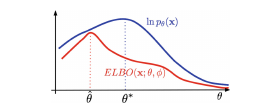

Fig.2 The ELBO is a lower bound on the log-likelihood. As a result, .θ̂ maximizing the ELBO does not necessarily coincides with .θ ∗ that maximizes .ln p(x). The looser the ELBO is, the more this can bias maximum likelihood estimates of the model parameters.

Let us wrap up what we know right now. First of all, we consider a class of amortized variational posteriors $ \{ q_{\phi}(z|x) \}_{\phi} $ that approximate the true posterior $ p(z|x) $. We can see them as stochastic encoders. Second, the conditional likelihood $ p(x|z) $ could be seen as a stochastic decoder. Third, the last component, $ p(z) $, is the marginal distribution, also referred to as a prior. Lastly, the objective is the ELBO, a lower bound to the log-likelihood function:

$$
\ln p(x) \geq \mathbb{E}_{z \sim q_{\phi}(z | x)} \left[ \ln p(x|z) \right] - \mathbb{E}_{z \sim q_{\phi}(z | x)} \left[ \ln q_{\phi}(z | x) \right] - \ln p(z)
$$

There are two questions left to get the full picture of the VAEs:

1. How to parameterize the distributions?
2. How to calculate the expected values?

After all, these integrals have not disappeared!

### Parameterization of Distributions

As you can probably guess by now, we use neural networks to parameterize the encoders and the decoders. But before we use the neural networks, we should know what distributions we use! Fortunately, in the VAE framework, we are almost free to choose any distribution! However, we must remember that they should make sense for a considered problem.

So far, we have explained everything through images, so let us continue that. If $ x \in \{ 0, 1, \dots, 255 \}^D $, then we cannot use a normal distribution, because its support is totally different than the support of discrete-valued images. A possible distribution we can use is the categorical distribution, that is:

$$
p_{\theta}(x|z) = \text{Categorical}(x | \theta(z)),
$$

where the probabilities are given by a neural network $ \text{NN} $, namely, $ \theta(z) = \text{softmax}(\text{NN}(z)) $. The neural network $ \text{NN} $ could be an MLP, a convolutional neural network, RNNs, etc.

The choice of a distribution for the latent variables depends on how we want to express the latent factors in data. For convenience, typically $ z $ is taken as a vector of continuous random variables, $ z \in \mathbb{R}^M $. Then, we can use Gaussians for both the variational posterior and the prior:

$$
q_{\phi}(z|x) = \mathcal{N}\left(z \,|\, \mu_{\phi}(x), \text{diag}(\sigma_{\phi}^2(x))\right)
$$

$$
p(z) = \mathcal{N}(z | 0, I),
$$

where $ \mu_{\phi}(x) $ and $ \sigma_{\phi}^2(x) $ are outputs of a neural network, similarly to the case of the decoder. In practice, we can have a shared neural network $ \text{NN}(x) $ that outputs $ 2M $ values that are further split into $ M $ values for the mean $ \mu $ and $ M $ values for the variance $ \sigma^2 $. For convenience, we consider a diagonal covariance matrix. We could use flexible posteriors (see Section 5.4.2). Moreover, here we take the standard Gaussian prior. We will comment on that later (see Section 5.4.1).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import numpy as np

# Set up the parameters
latent_dim = 2  # Dimensionality of the latent space
input_dim = 784  # Assuming input data is 28x28 (MNIST)
batch_size = 128
epochs = 50

# Build the encoder network
def build_encoder():
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(512, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    
    # The mean and log variance
    z_mean = layers.Dense(latent_dim, name='z_mean')(x)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
    
    encoder = Model(inputs, [z_mean, z_log_var], name="encoder")
    return encoder

# Sampling function to sample from the latent space using the reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
    return z

# Build the decoder network
def build_decoder():
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(input_dim, activation='sigmoid')(x)
    
    decoder = Model(latent_inputs, outputs, name="decoder")
    return decoder

# VAE model class
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    
    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = sampling([z_mean, z_log_var])
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1
        )
        self.add_loss(kl_loss)
        return reconstructed

# Load MNIST data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, input_dim)
x_test = x_test.reshape(-1, input_dim)

# Build the VAE
encoder = build_encoder()
decoder = build_decoder()
vae = VAE(encoder, decoder)

# Compile the VAE
vae.compile(optimizer=tf.keras.optimizers.Adam())

# Train the VAE
vae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, x_test))

# Generate new data (sample from latent space)
def generate_data(num_samples):
    z = np.random.normal(size=(num_samples, latent_dim))
    generated_data = vae.decoder(z)
    return generated_data

# Visualize the results
def visualize_latent_space():
    z_mean, z_log_var = encoder.predict(x_test, batch_size=batch_size)
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c='blue')
    plt.colorbar()
    plt.show()

# Generate and plot new images
def plot_generated_images():
    generated_data = generate_data(16)
    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_data[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

# Visualize the latent space
visualize_latent_space()

# Plot some generated images
plot_generated_images()
